In [2]:
#enables chart rendering
%matplotlib inline

In [1]:
!pip install -U git+https://github.com/jlondal/pyrugga.git

  Cloning https://github.com/jlondal/pyrugga.git to /tmp/pip-req-build-fy1d9dxk
  Stored in directory: /tmp/pip-ephem-wheel-cache-wdnbzo34/wheels/c4/c6/06/41574b4a3a768b91eeec22fe1a22c5ca0f5a9d0bdc0d36c6fa
Successfully built pyrugga
  Found existing installation: pyrugga 1.0.0
    Uninstalling pyrugga-1.0.0:
      Successfully uninstalled pyrugga-1.0.0


# First 10 Minutes 

Welcome to your first 10 minutes with Pyrugga. In this tutorial you will learn how to convert a Superscout XML into a Match object analyse a game of Rugby. 

The first step is to import Pyrugga library. This is as simple us typing 

In [3]:
import pyrugga as pgr
import pandas as pd
import numpy as np

Pyrugga requires a Super Scout file containing a play by play descriptions of a match. They are stored in an XML format which is not great for statistical analysis, but useful for other things. We need to convert the XML format  into something a little more friendly, a Pandas Dataframes. 

In [4]:
df = pgr.Match('game_1.xml')

A Match object contains a number of functions and Dataframes to help us analyse a match 

**Dataframes**

* Summary -- Summary of the match 
* Events -- Description of each action 
* Timeline -- A timeline of the match with periods ending when either possession of the ball changes or there was a stopage in play 

**Functions**

* getRef -- Will return the name of the referee
* Draw -- Will return if the match was drawn ?
* HomeWin -- Will return if home team won ?

to view the summary  line of a match

In [5]:
df.summary

,fixture_code,ref_id,ref_name,fixture_date,fx_week,awayteam,hometeam,home_score,away_score
0,719101,204,Peyper,27/10/2018,9,Natal Sharks,Western Province,12,17


to access the first 10 events of a match 

In [6]:
df.events.head(10)

,action_id,additional,advantage,description,event,event_type,fixture_code,home_team_advantage,match_time,metres,...,ps_endstamp,ps_timestamp,set_num,shirt_no,team_name,x_coord,x_coord_end,y_coord,y_coord_end,points
0,18665513,NaN,0,NaN,Period,Start Period,719101.0,0,0,0,...,0,0,0,0.0,Western Province,50,0,34,0,0
0,18665514,NaN,0,NaN,Restart,50m Restart Kick,719101.0,0,0,0,...,0,0,0,15.0,Natal Sharks,50,75,34,57,0
94,18665515,NaN,0,NaN,Collection,Restart Catch,719101.0,0,4,0,...,4,4,1,11.0,Western Province,26,0,13,0,0
65,18665516,NaN,0,NaN,Turnover,Dropped Ball Unforced,719101.0,0,4,0,...,4,4,1,11.0,Western Province,26,0,13,0,0
98,18665517,NaN,0,NaN,Collection,Defensive Loose Ball,719101.0,0,5,0,...,5,5,1,6.0,Natal Sharks,76,0,54,0,0
218,18665518,Neutral Contact,0,Neutral,Carry,Other Carry,719101.0,0,7,0,...,7,7,1,6.0,Natal Sharks,76,0,54,0,0
404,18665519,NaN,0,NaN,Tackle,Line Tackle,719101.0,0,7,0,...,7,7,1,11.0,Western Province,24,0,14,0,0
137,18665520,NaN,0,NaN,Ruck,NaN,719101.0,0,7,0,...,7,7,1,0.0,Natal Sharks,75,0,52,0,0
680,18665521,NaN,0,NaN,Pass,Complete Pass,719101.0,0,7,0,...,7,7,1,9.0,Natal Sharks,75,0,52,0,0
231,18665522,Neutral Contact,0,Crossed Gainline,Carry,One Out Drive,719101.0,0,12,2,...,12,12,1,3.0,Natal Sharks,75,0,52,0,0


to access the the Sharks first periods of play 

In [7]:
df.timeline.query('team_name == "Natal Sharks"').head(3)

,period,set_num,team_name,points,x_coord,x_coord_end,y_coord,y_coord_end,meters_gained,dist_traveled,...,fly_half_defensive,left_wing_defensive,inside_centre_defensive,outside_centre_defensive,right_wing_defensive,full_back_defensive,Natal Sharks,Western Province,Natal Sharks_points,Western Province_points
0,1,1,Natal Sharks,0,74,75,55,22,1,33.015148,...,0,2,0,0,0,0,0.0,0.0,0.0,0.0
1,1,2,Natal Sharks,0,24,59,1,54,35,63.513778,...,1,0,0,0,0,1,0.0,0.0,0.0,0.0
3,1,4,Natal Sharks,0,31,102,21,49,71,76.321688,...,0,0,1,0,0,1,0.0,0.0,0.0,0.0


And so on ...

In [8]:
df.Draw()

False

In [9]:
df.HomeWin()

False

In [10]:
df.getRef()

'Peyper'

# Some Analysis

Lets do to something a little more useful. To working which team had the most possession during a game. 

Remember our match is still stored in variable **df** and it contains three Dataframes called

* **events**, a blow by blow account of every action in a match
* **timelines**, match broken into periods of play ending with a stopage in play or change of posession 
* **summary**, a summary of the match

To access the timeline 

```python
df.timeline
```

then we will want to group by team_name and sum up the length of time each team had the ball. Group by is as simple as just ".groupby('team_name')" 

```python
df.timeline.groupby('team_name') 
```

and then to sum add ".sum()" and for length add "['length']" leaving us with 

In [11]:
df.timeline.groupby('team_name').sum()['length'] 

team_name
Natal Sharks        1349
Western Province     707
Name: length, dtype: int64

The Sharks had the ball 1349 seconds compare to Province 707 secounds.  

If we wanted to see this in a percentage we need to sum the column which requires adding another ".sum()"


In [12]:
df.timeline.groupby('team_name').sum()['length'] / (df.timeline.groupby('team_name').sum()['length'].sum())

team_name
Natal Sharks        0.656128
Western Province    0.343872
Name: length, dtype: float64

Say we want to see points per second with ball. We can see Province was slightly more effective scoring points than The Sharks.

In [13]:
df.timeline.groupby(['team_name']).sum()['length'] / (df.timeline.groupby('team_name')['points'].sum())

team_name
Natal Sharks        96.357143
Western Province    78.555556
dtype: float64

What about that other TV statistics we tend to see such as territory I here you say.

In [18]:
pos = df.getTerritory()
df.g

TypeError: _Zones() takes 1 positional argument but 2 were given

In [142]:
get_TerritoryY(df,perc=True)

team_name,Natal Sharks,Western Province
y_coord,,
1,0.133803,0.148318
2,0.226761,0.195719
3,0.112676,0.192661
4,0.160563,0.119266
5,0.204225,0.181957
6,0.132394,0.125382
7,0.029577,0.036697


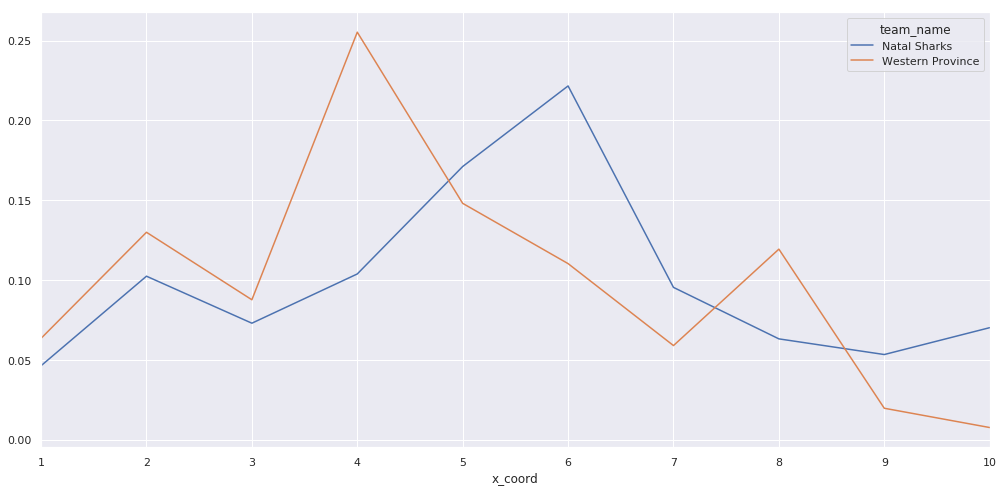

In [137]:
get_Territory(df,perc=True).plot(kind='line',figsize=(17,8))